<a href="https://colab.research.google.com/github/00150/AI_07_JYP_Project_section_02/blob/main/2022__%EC%9A%B0%ED%81%AC%EB%9D%BC%EC%9D%B4%EB%82%98_%EB%9F%AC%EC%8B%9C%EC%95%84_%EC%A0%84%EC%9F%81_part5%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%EC%A7%84%ED%96%89%EC%A4%91ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## Project2. 우크라이나 러시아 전쟁 🏹

>22.02.24 개전된 전쟁은 현재까지 계속 진행중에 있습니다.<br/>
주어진 데이터를 이용하여 손실 및 앞으로의 방향을 예측해보도록 합니다.<br/>

* ✔참고 : 컬럼 별 주요 데이터 출처는 **우크라이나 군대**와 **국방부** 입니다.

#### ❗주의.
* **장비 및 인력 손실의 수**는 **러시아에만 해당**합니다.
* 우크라이나에서는 자국의 장비 및 인력 손실에 관하여 정확하게 발표하지 않았습니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 필요한 패키지 & 라이브러리 import
import pandas as pd
import numpy as np
import scipy.stats as stats # 이 모듈을 이용히여 확률 분포, 요약 및 빈도 통계, 상관 함수 및 통계 테스트, 마스킹 통계, 커널 밀도 추정을 알 수 있다.
import matplotlib.pyplot as plt
from pylab import rcParams # 이미지 해상도 조절을 위해 불러온 패키지.
import seaborn as sns


# 시각화 : plotly 에  필요한 패키지 추가.
import plotly.express as px
import plotly.graph_objects as go




In [3]:
# 시각화 라이브러리 한글 깨짐 현상 방지

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [4]:
url1 = '/content/drive/MyDrive/new_project02/russia_losses_equipment.csv'
url2 = '/content/drive/MyDrive/new_project02/russia_losses_personnel.csv'

In [5]:
# 데이터 불러오기
df1 = pd.read_csv(url1)

In [6]:
df1.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN


In [7]:
# 데이터 불러오기 df2
df2 = pd.read_csv(url2)

In [8]:
df2.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0.0
1,2022-02-26,3,4300,about,0.0
2,2022-02-27,4,4500,about,0.0
3,2022-02-28,5,5300,about,0.0
4,2022-03-01,6,5710,about,200.0


---
## Part 1. Data EDA.
>분석, 예측 및 분류를 진행하기 이전에 데이터를 살펴보도록 합니다.<br>
가독성을 높히기 위하여 데이터의 컬럼을 한글로 바꿔줍니다.





In [9]:
df1.columns

Index(['date', 'day', 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system', 'greatest losses direction',
       'vehicles and fuel tanks', 'cruise missiles'],
      dtype='object')

In [10]:
# 컬럼명을 변경하기 전의 이름을 보관합니다.
columns_name_not_modified = df1.columns

In [11]:
eq_df = df1.rename(columns={'date':'날짜','day':'개전일','aircraft':'항공기','helicopter':'헬리콥터','tank' : '탱크',
                    'APC':'장갑차','field artillery': '야포' ,'MRL' :'다중로켓발사기','military auto' : '자동화기기',
                    'fuel tank': '연료탱크', 'drone':'드론' ,'naval ship' : '해군함정', 'anti-aircraft warfare' : '방공포', 'special equipment' : '특수_장비',
                    'mobile SRBM system' : '자동화_탄도_미사일', 'vehicles and fuel tanks' : '탈것_및_연료탱크', 'cruise missiles' : '크루즈_미사일','greatest losses direction' : '피해가_큰_지역'})

eq_df.head()

,날짜,개전일,항공기,헬리콥터,탱크,장갑차,야포,다중로켓발사기,자동화기기,연료탱크,드론,해군함정,방공포,특수_장비,자동화_탄도_미사일,피해가_큰_지역,탈것_및_연료탱크,크루즈_미사일
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN


#### df2의 데이터의 컬럼명 또한 변경합니다.

In [12]:
pp_df = df2.rename(columns={'date':'날짜', 'day':'개전일', 'personnel':'사망자_수', 'personnel*':'불확실한_사망자', 'POW':'전쟁_포로'})
pp_df

,날짜,개전일,사망자_수,불확실한_사망자,전쟁_포로
0,2022-02-25,2,2800,about,0.0
1,2022-02-26,3,4300,about,0.0
2,2022-02-27,4,4500,about,0.0
3,2022-02-28,5,5300,about,0.0
4,2022-03-01,6,5710,about,200.0
...,...,...,...,...,...
160,2022-08-04,162,41500,about,NaN
161,2022-08-05,163,41650,about,NaN
162,2022-08-06,164,41900,about,NaN
163,2022-08-07,165,42200,about,NaN


#### 데이터 정제 전 중요 사항.
* 장비 및 인원의 손실수는 오직 러시아만 성립한다.


참고하고 있는 url

https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war?select=russia_losses_personnel.csv <br>


https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war <br>


https://www.kaggle.com/code/piterfm/ukraine-russia-war-daily-data?scriptVersionId=102179843 <br>


---
## Part. 1-2 일별 데이터 생성📅
> 중복된 값들을 정제하여 일별 데이터를 생성합니다.


In [13]:
#데이터의 정보를 확인합니다.
eq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   날짜          165 non-null    object 
 1   개전일         165 non-null    int64  
 2   항공기         165 non-null    int64  
 3   헬리콥터        165 non-null    int64  
 4   탱크          165 non-null    int64  
 5   장갑차         165 non-null    int64  
 6   야포          165 non-null    int64  
 7   다중로켓발사기     165 non-null    int64  
 8   자동화기기       65 non-null     float64
 9   연료탱크        65 non-null     float64
 10  드론          165 non-null    int64  
 11  해군함정        165 non-null    int64  
 12  방공포         165 non-null    int64  
 13  특수_장비       146 non-null    float64
 14  자동화_탄도_미사일  36 non-null     float64
 15  피해가_큰_지역    106 non-null    object 
 16  탈것_및_연료탱크   100 non-null    float64
 17  크루즈_미사일     100 non-null    float64
dtypes: float64(6), int64(10), object(2)
memory usage: 23.3+ KB


In [14]:
pp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        165 non-null    object 
 1   개전일       165 non-null    int64  
 2   사망자_수     165 non-null    int64  
 3   불확실한_사망자  165 non-null    object 
 4   전쟁_포로     62 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.6+ KB


#### 날짜 데이터는 object 형태로 되어 있습니다.
* datetime으로 변경합니다.

In [15]:
eq_df['날짜'] = pd.to_datetime(eq_df['날짜']) 
pp_df['날짜'] = pd.to_datetime(eq_df['날짜'])

---
#### 특정 컬럼을 데이터의 인덱스로 지정합니다.
* 두 개의 데이터의 모두 적용합니다.
* 적용되는 부분은 다음과 같습니다.

> 장비를 나타내는 데이터 : 날짜, 개전일, 피해가 큰 지역 <br/>

> 전쟁중 일어난 사망인원을 나타낸 데이터 : 날짜, 개전일, 불분명한 사망자 수</br>

In [16]:
# 장비 데이터 인덱스 변환
eq_df = eq_df.set_index(['날짜', '개전일','피해가_큰_지역'])

In [17]:
eq_df = eq_df.diff().fillna(eq_df).fillna(0).astype(int).reset_index()

In [18]:
eq_df.tail(20)

,날짜,개전일,피해가_큰_지역,항공기,헬리콥터,탱크,장갑차,야포,다중로켓발사기,자동화기기,연료탱크,드론,해군함정,방공포,특수_장비,자동화_탄도_미사일,탈것_및_연료탱크,크루즈_미사일
145,2022-07-20,147,Bakhmut,1,0,9,13,5,2,0,0,10,0,0,0,0,8,0
146,2022-07-21,148,Sloviansk,0,0,4,7,3,1,0,0,7,0,0,2,0,6,0
147,2022-07-22,149,Kryvyi Rih and Bakhmut,0,0,0,8,4,0,0,0,3,0,0,0,0,22,0
148,2022-07-23,150,"Kramatorsk, Kryvyi Rih and Bakhmut",0,0,4,9,1,2,0,0,1,0,0,0,0,17,0
149,2022-07-24,151,Kramatorsk,0,0,14,13,5,2,0,0,0,0,0,1,0,3,3
150,2022-07-25,152,Kramatorsk,1,0,8,8,7,2,0,0,5,0,3,0,0,9,4
151,2022-07-26,153,Bakhmut,0,1,7,9,4,1,0,0,3,0,1,2,0,3,0
152,2022-07-27,154,Kryvyi Rih,0,1,1,12,3,0,0,0,4,0,0,0,0,12,0
153,2022-07-28,155,Kryvyi Rih,0,0,4,8,11,0,0,0,3,0,0,0,0,7,0
154,2022-07-29,156,Kryvyi Rih,0,0,7,8,6,0,0,0,2,0,0,2,0,16,0


In [19]:
pp_df = pp_df.set_index(['날짜', '개전일','불확실한_사망자'])
pp_df

,,,사망자_수,전쟁_포로
날짜,개전일,불확실한_사망자,,
2022-02-25,2,about,2800,0.0
2022-02-26,3,about,4300,0.0
2022-02-27,4,about,4500,0.0
2022-02-28,5,about,5300,0.0
2022-03-01,6,about,5710,200.0
...,...,...,...,...
2022-08-04,162,about,41500,NaN
2022-08-05,163,about,41650,NaN
2022-08-06,164,about,41900,NaN


In [20]:
pp_df = pp_df.diff().fillna(pp_df).fillna(0).astype(int).reset_index()
pp_df

,날짜,개전일,불확실한_사망자,사망자_수,전쟁_포로
0,2022-02-25,2,about,2800,0
1,2022-02-26,3,about,1500,0
2,2022-02-27,4,about,200,0
3,2022-02-28,5,about,800,0
4,2022-03-01,6,about,410,200
...,...,...,...,...,...
160,2022-08-04,162,about,150,0
161,2022-08-05,163,about,150,0
162,2022-08-06,164,about,250,0
163,2022-08-07,165,about,300,0


---
#### 일별 데이터 사용 : 일별의 드론 파괴 개수


In [21]:
import matplotlib.pyplot as plt
from  matplotlib import dates #날짜를 정교하게 표기하기 위함
from dateutil.relativedelta import relativedelta


# 시각화 자료 : 
fig_author = 'Jin Young'


# 날짜 시간 변경하기
fig_date = pd.Timestamp('today').date()


# 기간
period_months = 2

# 살펴볼 컬럼 지정
column_equipment = '드론'
column_date = '날짜'


In [22]:
# 살펴볼 구간만 지정하여 데이터 출력.
df_ = eq_df[[column_date, column_equipment]]

# 마지막 행 : 날짜
date_last = df_.iloc[-1][column_date]

#날짜 계산
date_first = date_last - relativedelta(months=+period_months)

####참고🎇
* 

```timedelta``` 에서 month를 계산하는 방식이 없으므로,
```relativedelta``` 함수를 이용하여 계산한다.



```
#아래와 같은 형식이 지원되지 않는다.
# month_before = (datetime.strptime(target_date, '%Y-%m-%d') - timedelta(months = 1)).strftime('%Y-%m-%d') 
```






In [23]:
date_first

Timestamp('2022-06-08 00:00:00')

In [24]:
# date_first의 값은 다음과 같습니다.
# Timestamp('2022-06-08 00:00:00')


#기준점 날짜 'date_first'를 계산하여
df_ = df_[df_[column_date]>date_first].copy()


# 각 데이터 컬럼별 리스트화
label_list = df_[column_date]
number_list = df_[column_equipment]

In [25]:
# 각 데이터 컬럼별 리스트화

# 1. 날짜
label_list = df_[column_date]

# 2. 확인하고 싶은 장비
number_list = df_[column_equipment]

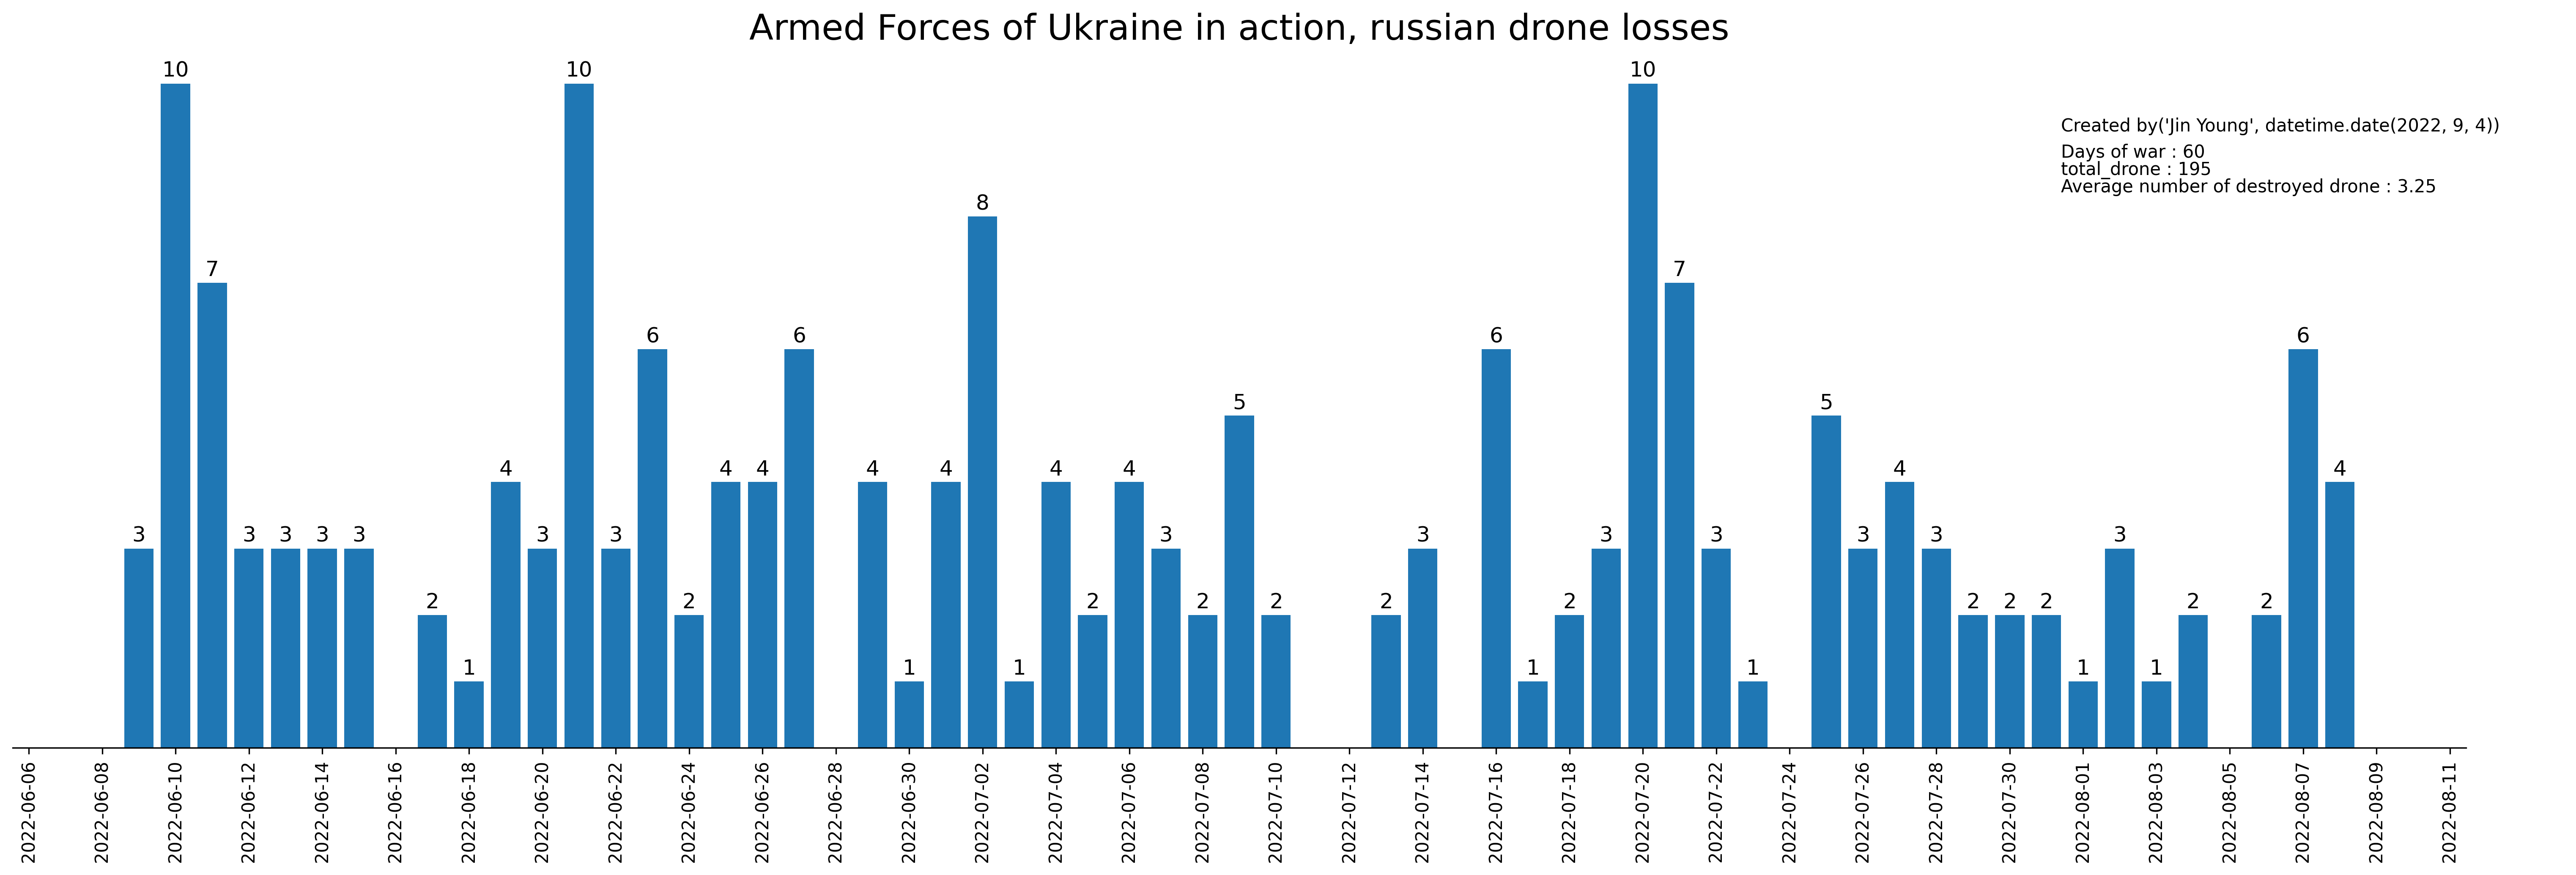

In [26]:
# 데이터 시각화

fig = plt.figure(figsize=(21,7), dpi=300)
ax = fig.add_subplot()
ax.bar(label_list, number_list)

xx =''

for patch in ax.patches:
  xx = ax.text(
      patch.get_x()+patch.get_width()/2,
      patch.get_height()+0.1,
      patch.get_height() if patch.get_height() !=0 else'',
      ha = 'center',
      fontsize=12
  )


#눈금 레이블 및 눈금선의 모양 변경 => tick_params
ax.tick_params(axis = 'x', labelrotation=90)


# 눈금 표시기의 위치 설정
ax.xaxis.set_major_locator(dates.DayLocator(interval=2))


# 각 눈금레이블을  그릴지에 대한 여부이다.(parameter = labelleft)
ax.tick_params(labelleft=False)


# 눈금 위치 설정 (parameter= left, right, both, default, none)
# none 및 both는 레이블이 아닌 눈금에만 영향을 줍니다.
# none : 두 위치의 눈금, 왼쪽의 레이블, 틱을 원하지 않을 때 사용합니다.
# both : 눈금이 두 위치에 모두 나타나도록 사용하지만, 눈금 레이블은 변경하지 않습니다.
ax.yaxis.set_ticks_position('none')


# ax.spines : 데이터 플롯 영역을 제한하는 선이다, 상황에 따라 일부를 제거하거나, 색상을 변경하거나, 보이지 않게 또는 너비/스타일 조절 등이 가능...
# ax.spines[원하는위치]
# set_visible (가시성 설정)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)


# 텍스트 추가
# 2022년 06월 08일부터 2022 08월 09일까지 파괴된 드론의 수 (러시아)
total_drone = df_['드론'].sum()


# 표에서 나타난 개전일
early = df_.at[104,'날짜']


# 날짜
latest = df_.at[164,'날짜']


# 총 개전일 
period = (latest - early).days


# pyplot으로 주석을 나타내는 annotate를 사용해보기. 
ax.annotate(f'Created by{fig_author, fig_date}', xy=(0.8, 0.85), xycoords = 'figure fraction')
ax.annotate(f'Days of war : {period}', xy=(0.8, 0.82), xycoords = 'figure fraction')
ax.annotate(f'total_drone : {total_drone}', xy=(0.8, 0.8), xycoords = 'figure fraction')
ax.annotate(f'Average number of destroyed drone : {total_drone / period }',xy=(0.8, 0.78),xycoords = 'figure fraction')


# 제목
plt.title(f'Armed Forces of Ukraine in action, russian drone losses',fontsize=20)


# tight_layout() : 서브플롯 사이 패딩 값 조정
plt.tight_layout()


# savefig 현재 그림 저장
# plt.savefig('{}.png'.format(column_equipment))


#출력 
plt.show()

---
## Part 2. 데이터 분석
> 주어진 데이터를 최대한 이용하여 데이터를 분석하도록 합니다.

#### Part 2-1 . 🔍 피해가 가장 큰 지역은 어디일까요?
> 가장 큰 피해를 입은 지역의 장비 파괴 개수를 살펴보면 알 수 있을  것 같습니다.
전투가 격렬한만큼, 피해 및 부상에 대한 개수가 확연하게 많이 드러날 것 입니다.

In [27]:
# 가장 많은 피해를 입은 도시 및 가장 피해가 적은 지역을 찾아봅시다.
# 파괴된 장비의 총 개수가 가장 많은 지역 및 가장 적은 지역을 찾아봅시다.
# 새로운 컬럼을 추가합니다.  - 파괴된 장비의 총 개수
eq_df['파괴된_장비의_총_개수'] = eq_df[eq_df.columns.difference(['날짜','개전일','피해가_큰_지역'])].sum(axis=1)


#새로운 데이터를 생성합니다.
region_df = eq_df[['파괴된_장비의_총_개수','피해가_큰_지역']].sort_values(by='파괴된_장비의_총_개수', ascending = False)


# grouby를 통하여 도시별 평균값 구하기
region_df.groupby('피해가_큰_지역').mean().sort_values(by='파괴된_장비의_총_개수', ascending = False)

,파괴된_장비의_총_개수
피해가_큰_지역,
Izyum,473.000000
Popasna,125.000000
Zaporizhzhia and Izyum,123.000000
"Izyum, Novopavlivsk",115.000000
"Novopavlivsk, Kurakhove and Sievierodonetsk",103.000000
Novopavlivsk,96.000000
Sievierodonetsk,95.333333
Lyman and Kurakhove,94.000000
Kurakhove and Izyum,89.000000


#### 🗺가장 많은 피해를 입은 지역과, 가장 적은 피해를 입은 지역을 시각화합니다.

In [28]:
# 시각화 표현 : 현재 침략 당하고 있는 국가

# 시각화에 필요한 라이브러리 선언.

import folium as F

# 우크라이나 위도 표시 
ukraine_lat = 48.383022

# 우크라이나 경도 표시  
ukraine_long = 31.1828699

urkraine_map = F.Map(location = [ukraine_lat, ukraine_long], tiles = 'Stamen Terrain', zoom_start = 6.49) 

# F.Map : 파라미터
# zoom_start (int, default 10) - 맵의 초기 확대 및 축소 수준.
# tiles - 타일, 초기 수준


# FeatureGroup() :  하나의 레이어에 포함하여 단일 레이어로 처리합니다. 
Izyum = F.map.FeatureGroup()


# Izyum 위도 : 49.209
Izyum_lat = 49.208889

# Izyum 경도 : 37.248
Izyum_long = 37.248611

# add_child : 처음, 지도에 '자식 객체'를 추가하고, 이 후 두번 째 맵에 저장한다.
Izyum.add_child(F.features.CircleMarker([Izyum_lat, Izyum_long], radius=5, color= 'blue', fill_color = 'blue'))


# urkraine_map의 지도 또한 Izyum의 객체에 포함시킨다.
urkraine_map.add_child(Izyum)

# 시각화 - 마커 표기
# add_to : 미리 만들어놓은 변수에 내용 추가
F.Marker([Izyum_lat, Izyum_long], popup = 'the most damaged city').add_to(urkraine_map)



# 피해가 적은 지역 또한 지도에 표기합니다.
# 피해가 적은 지역 - Mykolaiv

Mykolaiv = F.map.FeatureGroup()

# 위도 49.523611
Mykolaiv_lat = 49.523611

# 경도 23.985278
Mykolaiv_long = 23.985278

Mykolaiv.add_child(F.features.CircleMarker([Mykolaiv_lat, Mykolaiv_long], radius=5, color='blue', fill_color='blue'))
urkraine_map.add_child(Mykolaiv)

F.Marker([Mykolaiv_lat, Mykolaiv_long], popup='the least affected city').add_to(urkraine_map)



# 러시아: 모스크바 (Moscow)
Moscow = F.map.FeatureGroup()
# 위도 : 55.75
Moscow_lat = 55.75

# 경도 : 37.616667
Moscow_long = 37.616667

Moscow.add_child(F.features.CircleMarker([Moscow_lat, Moscow_long], radius=5, color ='red', fill_color='red'))
urkraine_map.add_child(Moscow)

F.Marker([Moscow_lat,Moscow_long], popup='aggression country').add_to(urkraine_map)


# PolyLine 생성
# 모스크바를 기준으로 각각 도시에 대하여 Line을 생성합니다.
Line_1 = [[Mykolaiv_lat, Mykolaiv_long],[Moscow_lat, Moscow_long]]
Line_2 = [[Izyum_lat, Izyum_long], [Moscow_lat, Moscow_long]]

# Mykolaiv 에서 Moscow
F.PolyLine(locations = Line_1, popup='Mykolaiv : 1,374.3Km' ,tooltip='Mykolaiv : 1,374.3Km').add_to(urkraine_map)

# Izyum 에서 Moscow
F.PolyLine(locations = Line_2,popup='Izyum : 860.7Km',  tooltip='Izyum : 860.7Km').add_to(urkraine_map)
urkraine_map

In [29]:
# 새롭게 생성된 데이터 'region_df'에 나와있는 모든 지역에 대하여 거리를 입력 합니다.
# 새로운 컬럼을 생성합니다.

import copy
region_df['모스크바로부터의_거리(km)'] = region_df['피해가_큰_지역'].copy()

# 특정 조건을 만족할 시 값 변경
region_df.loc[region_df['모스크바로부터의_거리(km)'] == 'Izyum', '모스크바로부터의_거리(km)'] = 860.7   
region_df.loc[region_df['모스크바로부터의_거리(km)'] == 'Sievierodonetsk', '모스크바로부터의_거리(km)'] = 1024.2
region_df.loc[region_df['모스크바로부터의_거리(km)'] == 'Popasna', '모스크바로부터의_거리(km)'] = 1067.7  
region_df.loc[region_df['모스크바로부터의_거리(km)'] == 'Zaporizhzhia', '모스크바로부터의_거리(km)'] = 1038.8
region_df.loc[region_df['모스크바로부터의_거리(km)'] == 'Novopavlivsk', '모스크바로부터의_거리(km)'] = 1613
region_df.loc[region_df['모스크바로부터의_거리(km)'] == 'Kurakhove', '모스크바로부터의_거리(km)'] = 1052
region_df.loc[region_df['모스크바로부터의_거리(km)'] == 'Sloviansk', '모스크바로부터의_거리(km)'] = 911
region_df.loc[region_df['모스크바로부터의_거리(km)'] == 'Kryvyi Rih', '모스크바로부터의_거리(km)'] = 1104
region_df.loc[region_df['모스크바로부터의_거리(km)'] == 'Lyman', '모스크바로부터의_거리(km)'] = 946
region_df.loc[region_df['모스크바로부터의_거리(km)'] == 'Avdiivka', '모스크바로부터의_거리(km)'] = 1030
region_df.loc[region_df['모스크바로부터의_거리(km)'] == 'Kramatorsk', '모스크바로부터의_거리(km)'] = 930
region_df.loc[region_df['모스크바로부터의_거리(km)'] == 'Slobozhanskyi', '모스크바로부터의_거리(km)'] = 785
region_df.loc[region_df['모스크바로부터의_거리(km)'] == 'Donetsk', '모스크바로부터의_거리(km)'] = 1236
region_df.loc[region_df['모스크바로부터의_거리(km)'] == 'Mykolaiv', '모스크바로부터의_거리(km)'] = 1374
region_df.loc[region_df['모스크바로부터의_거리(km)'] == 'Bakhmut', '모스크바로부터의_거리(km)'] = 1087


region_df['모스크바로부터의_거리(km)'].unique()


# 피해가 큰 지역에 대하여 결측값 채워넣기.
region_df.fillna('Unable to verify', inplace=True)


# 결측치를 채워넣은 컬럼의 값 확인하기. 
# region_df['피해가 큰 지역'].unique() 



# Unable to verify 을 가지고 있는 행 제외
index_drop = region_df[region_df['피해가_큰_지역'] == 'Unable to verify'].index #print(index_drop)
drop_index_df = region_df.drop(index_drop)


# 피해가 큰 지역이 두 군데로 나와있는 경우 또한 제외한다.
index_drop_str = region_df[region_df['모스크바로부터의_거리(km)'] == str].index #print(index_drop)
drop_index_df = drop_index_df.drop(index_drop_str)
drop_index_df


# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None) 


drop_index_df.reset_index(drop= True, inplace = True)
drop_index_df


# 최종
index_number = [5,6,7,8,10,11,17,18,19,22,23,25,26,28,29,32,41,44,49,51,53,57,58,62,65,73,77,78,79,82,83,88,92,89,98,99,100,103]
final_drop = drop_index_df.drop(index_number)
final_drop 


# 데이터 정렬
sort_df = final_drop.groupby(['피해가_큰_지역','모스크바로부터의_거리(km)']).mean()
sort_df

,,파괴된_장비의_총_개수
피해가_큰_지역,모스크바로부터의_거리(km),
Avdiivka,1030.0,56.000000
Bakhmut,1087.0,42.041667
Donetsk,1236.0,40.400000
Izyum,860.7,473.000000
Kramatorsk,930.0,41.875000
Kryvyi Rih,1104.0,35.666667
Kurakhove,1052.0,77.666667
Lyman,946.0,39.000000
Mykolaiv,1374.0,10.000000


In [30]:
# 데이터 정렬
sort_df.sort_values(by=['모스크바로부터의_거리(km)'], ascending= False, inplace= True)
sort_df = sort_df.reset_index()


import plotly.express as px


# 시각화
fig = px.bar(sort_df, x='피해가_큰_지역', y='파괴된_장비의_총_개수',
             hover_data = ['모스크바로부터의_거리(km)'])


fig.update_layout(title = '<b> 거리에 따른 각 지역의 파괴량 </b>')


fig.show(renderer='colab')

#### Part 2-2. 상관관계 분석.
지역에 '거리'에 따라 '파괴된_장비의_총_개수'는 차이가 있다.<br/>
지역에 '거리'에 따라 '파괴된_장비의_총_ 개수'는 차이가 없다.<br/>


> '거리' 및 '파괴된_장비의_총_개수'는 모두 연속형 변수입니다.<br/>
* 상관분석 or 회귀분석을 진행하여 알아봅시다.

####   ⬛참고⬛  **상관분석 or 상관관계 분석**
은 두 변수간의 어떤 선형적 관계를 가지는지 분석하는 기법으로 상관계수를 이용하여 측정하는 방법입니다.


* 장점
  - A,B 가 Positive correltaion 이란 사실은 알 수 있습니다.

* 단점
  - A의 증가가 원인이 되어 B가 증가하는지, B가 증가하는 것이 원인이 되어 A가 증가하는지는 알 수 없습니다.




🔰따라서 원인과 결과에 대한 분석이 필요하다면, 상관분석이 아닌 회귀 분석을 진행해야합니다. <br/>



----
#### Part 2-2-1.
>상관 관계(=상관 계수)는 두 변수 간 어떤 선형적 관계를 가지는지 분석하는 상관분석을 통해 도출된다.

**상관분석**은 아래 4가지 기본 과정을 거쳐야 합니다.
* 선형성
  - X,Y의 관계가 직선적인지 알아보는 것. (분포도를 나타내는 산점도를 통해 확인가능)

* 동변량성
  - X의 값과 관계없이 Y의 산포도가 같은 것을 의미.


* 두 변수의 정규 분포성
  - 두 변수의 측정치 분포가 모집단에서 모두 정규분포를 이루는 것이다.
  정규분포란, 2개의 매개 변수 평균$(mu)$과 표준편차$(σ)$에 의해 모양이 결정되고,
  이때의 분포를 $N(μ,σ^2 )$ 으로 표기합니다.


* 무선 독립 표본
  - 모집단에서 표본을 추출할 때 표본대상이 확률적으로 선정된다


이러한 기본 가정하에 두 변수는 독립적이거나 상관된 관계일 수 있다.<br/>
이 두 관계의 상도를 상관계수로 표현하는데, 수치의 단위로 모 상관계수는 $p$, 표본 상관계수로 $r$로 표기한다. <br/>


❗하지만, 위에서 언급한 것처럼, 상관계수는 두 변수의 연관정도를 표현한 것이며,
인과관계를 설명할 수 있는 것은 아니다.
* 인과관계는 회귀분석을 통해 해당 관계의 방향과 정도, 그리고 적용할 수학적 모델을 추정할 수 있다.

* 상관분석의 종류는 단순, 다중, 편 상관 분석이 존재한다. 


https://aliencoder.tistory.com/13



####🔅 상관관계 분석 : 피어슨 상관관계 분석을 진행합니다. 
r값은  x,y가 완전 동일하다면 1, 전혀 다르다면 0, 반대 방향으로 완전하게 동일하면 -1의 값을 같습니다. 

In [31]:
sort_df.head(2)

,피해가_큰_지역,모스크바로부터의_거리(km),파괴된_장비의_총_개수
0,Novopavlivsk,1613.0,96.0
1,Mykolaiv,1374.0,10.0


In [32]:
#인덱스 초기화
sort_df.reset_index(inplace = True)

# 인덱스 지정
sort_df.set_index(['피해가_큰_지역'], inplace = True, drop =True)

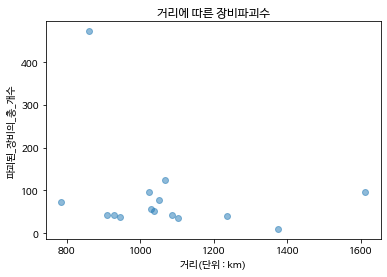

In [33]:
# 1. 산점도 파악 : 두 변수에 대한 관계를 시각적으로 파악.

X = sort_df['모스크바로부터의_거리(km)'].values
Y = sort_df['파괴된_장비의_총_개수'].values

# 한글깨짐 방지 폰트 지정 matplotlib.
plt.rc('font', family='NanumBarunGothic') 
plt.show()

plt.scatter(X, Y, alpha=0.5)
plt.title('거리에 따른 장비파괴수')
plt.xlabel('거리(단위 : km)')
plt.ylabel('파괴된_장비의_총_개수')
plt.show()


결과 : 산점도만으로 쉽게 유추할 수 없음. <br/>
Why? : 데이터 자체가 불명확한 느낌 및 데이터의 부족으로 인한 결과라고 생각하게 됨.

#### 공분산 및 상관계수
> 산점도를 이용하면 두 변수간의 직선적인 관계를 대략적으로 파악이 가능하지만, 두 변수 사이의 관계를 어떠한 수치로 표현하지 않는다.

  - 두 변수간의 관계를 수치로 표현하기 위해 공분산 및 상관계수를 이용한다.


**✅ 공분산이란?**<br/>
2개의 확률변수의 상관정도를 나태는 값으로, 만약 2개의 변수중 하나의 값이
상승하는 경향을 보일 때, 다른 값도 상승하면 공분산의 값은 양수, 반대로
다른 값이 하강하는 경향을 보이면 공분산의 값은 음수가 나온다.

In [34]:
np.cov(X,Y)[0,1]

-6005.356753968252

**🤔 하지만, 이것으로는 부족합니다 ❗❗**
> 공분산 자체는 상관관계의 상승 혹은 하강하는 경향을 이해할 수 있지만, 
2개의 변수 측정 단위의 크기에 따라 값이 달라지므로, 절대적 강도를 파악하기에는 한계가 존재합니다.

* 즉, **$-6005.XXXXX.....$라는 숫자가 어느정도의 음의 상관관계인지를 가늠하기가 쉽지 않습니다.**

* 그래서 **공분산을 표준화 시킨 상관계수를 보다 많이 이용**합니다. 


In [35]:
#corrcoef() 함수를 이용하기.
np.corrcoef(X,Y)[0,1]

-0.26010875869254735

🧐상관계수는 -1에서 1사이의 값을 가지며, 0인 경우에는 선형관계가 전혀 없음을 의미합니다.<br/>

> 현재 우리가 계산한 상관계수의 값은  -0.26....입니다.<br/>
이 것은 한 변수가 증가할 때 다른 변수는 감소하는 경향을 띕니다.

다시 말해, **'거리' 와 '장비파괴량'둘 사이의 관계에서 한 변수가 증가한다면, 다른 변수는 낮아집니다.**

https://sunnyyanolza.tistory.com/42

**❗주의할 점❗** <br/>
Pearson 상관계수는 극단 데이터의 영향을 상당히 많이 받습니다..<br/>
데이터의 집합에 나머지 값들과 매우 다른 값들이 존재한다면, 상관계수의 값이 크게 변경될 수 있습니다.<br/>


💥산점도에서 극단적으로 값이 튀는 부분은 **'Izyum'** 라는 지역의 장비파괴량 값이었습니다.

#### Part 2-2-2 이상치로 판단해야할까요....?
>이상치 : 관측된 데이터의 범위에서 많이 벗어난 아주 작은 값이나 큰 값

✔ 이상치 원인
* 데이터 수집 중 실수
* 측정 과정에서의 오류 
  - ex) 몸무게 측정시, 100번의 시행 중 한 번 이상 영점 조정을 하지 않고 측정한 경우
* 실험 조건 차이의 오류 
  - ex) 이전과의 측정과 조건이 다른 경우
* 데이터 마이닝시, 처리하고 조합시 생기는 오류

🤨 현 데이터는, 장비의 파괴량을 그대로 수집하여 기록하였으며,<br/>
지역의 특성 및 규모에 등의 다양한 원인으로 장비의 파괴량이 충분히 다를 수 있다. <br/>
그러므로 의도와 과정이 맞는 데이터라고 간주하겠습니다. <br>

https://dacon.io/forum/405933

#### 상관계수의 검정
>'상관계수 값 자체가 유의미한가?'를 검정할 수도 있습니다.

* 보통 p-value를 많이 이용합니다.
  - scipy 패키지의 stats.pearsonr() 을 이용하면 상관계수와 p-value를 동시에 얻을 수 있습니다.
  

In [36]:
import scipy.stats as stats
stats.pearsonr(X,Y)

# Ho : 거리와 파괴량의 상관 관계는 존재한다.
# Ha : 거리와 파괴량의 상관 관계는 존재하지 않는다.

(-0.2601087586925474, 0.3491408158358652)

#### p-value의 값이 0.05보다 큰 값이므로, 'Ho : 귀무가설'을 그대로 채택합니다.

---
##PART. 3 도시별 파괴된 장비량의 차이 : manova test
> 또 다른 가설을 세워 증명하고, 해답을 찾길 원합니다.<br/>
 장비를 탑승장비 및 전략장비로 나누고, 탑승 장비에 따른 가설을 증명하고 시각화해봅시다.

* **Ho** : 도시별 탑승 장비별 파괴량의 차이는 존재하지 않는다.
* **Ha** : 도시별 탑승 장비별 파괴량의 차이는 존재한다.

**🚙 탑승장비**
* 항공기, 헬리콥터, 탱크, 장갑차,해군함정, 탈것 및 연료탱크

**😼 전략무기**
* 야포, 다중로켓발사기, 자동화기기, 연료탱크, 드론, 방공포, 특수 장비, 자동화 탄도 미사일, 크루즈 미사일

> **독립변수** : 러시아(모스크바로)로부터 각각 도시까지의 거리( Kurakhove, Bakhmut, Zaporizhzhia.....* 단위: km) <br>
**종속변수** : 각 도시별 바괴된 장비 (항공기, 헬리콥터, 탱크, 장갑차.....) 


* 참고 : anova 테스트에서 **독립변수**에는 <U>범주형 변수</U>,  **종속변수**는 <U>연속형 변수</U>여야 한다.


In [37]:
# 탑승 장비를 살펴보기 위한 데이터를 따로 구성 및 정제합니다.


# eq_df, pp_df 합성하기.
merge_df = pd.merge(eq_df, pp_df, on = ['날짜','개전일'])


#필요하지 않는 컬럼 제거
theory_df_01 = merge_df.drop(['날짜', '개전일', '파괴된_장비의_총_개수'], axis =1)


columns_vehicle = ['항공기', '헬리콥터', '탱크', '장갑차','해군함정','탈것_및_연료탱크']
columns_strategy = ['야포', '다중로켓발사기','자동화기기', '연료탱크', '드론', '방공포', '특수_장비', '자동화_탄도_미사일', '크루즈_미사일']


theory_df_01 = theory_df_01.drop(columns_strategy, axis = 1)


# 피해가 큰 지역에 대하여 결측값 채워넣기.
theory_df_01.fillna('Unable to verify', inplace=True)

# 두 개 이상의 지역을 나타내는 데이터 제거.
# 두 개 이상의 지역을 나타내는 데이터의 인덱스 번호(리스트 생성)

# 지역이름이 2개 이상인 지역 제외.
index_number = [61, 62, 68, 70, 75, 79, 80, 81, 82, 83, 92, 95, 96, 105, 106, 107, 110, 113, 114, 115, 116, 117, 119, 120, 121, 122, 128, 129, 130, 131, 132, 147, 148, 157, 158, 159, 160]

# 인덱스 제거 
drop_index = theory_df_01.drop(index_number, inplace = True)
drop_index


# Unable to verify 을 가지고 있는 행 제외
index_drop = theory_df_01[theory_df_01['피해가_큰_지역'] == 'Unable to verify'].index #print(index_drop)
modified_df = theory_df_01.drop(index_drop)

modified_df

,피해가_큰_지역,항공기,헬리콥터,탱크,장갑차,해군함정,탈것_및_연료탱크,불확실한_사망자,사망자_수,전쟁_포로
59,Sievierodonetsk,2,0,11,20,0,0,about,100,0
60,Sievierodonetsk,3,0,34,50,0,0,about,200,0
63,Izyum,2,0,16,29,0,0,about,200,0
64,Izyum,1,0,22,27,0,0,about,200,0
65,Izyum,2,0,18,26,0,1796,about,300,0
66,Izyum,2,0,22,48,0,28,about,300,0
67,Izyum,0,0,14,48,2,19,about,400,0
69,Popasna,2,0,15,41,0,40,about,200,0
71,Slobozhanskyi,0,0,12,27,0,8,about,200,0
72,Novopavlivsk,0,1,8,28,1,27,about,400,0


In [38]:
# 필요한 라이브러리 불러오기.

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [39]:
maov = MANOVA.from_formula('항공기 + 헬리콥터 + 탱크 + 장갑차 + 해군함정 + 탈것_및_연료탱크 ~ 피해가_큰_지역', data = modified_df)
print(maov.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
         Intercept        Value  Num DF  Den DF F Value Pr > F
--------------------------------------------------------------
            Wilks' lambda 0.6022 6.0000 49.0000  5.3943 0.0002
           Pillai's trace 0.3978 6.0000 49.0000  5.3943 0.0002
   Hotelling-Lawley trace 0.6605 6.0000 49.0000  5.3943 0.0002
      Roy's greatest root 0.6605 6.0000 49.0000  5.3943 0.0002
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
        피해가_큰_지역        Value   Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.0960 84.0000 279.4875  1.7391 0.0005
         Pillai's trace 1.6533 84.0000 324.0000  1.4671 0.0100
 Hotelling-

####Part 3 manova-t의 결과 
* P - value 값을 나타내는 Pr > F의 값이 0.05보다 낮다면 귀무가설을 버리고, 대립가설을 선택한다.

**💥즉, 도시별 '탑승 장비' <u>파괴량은 차이가 있다.</u>**

**주의할 점 ❗**
>Manova - test 에서 멈춘다면, 어떠한 지역이 이 가설에 영향을 미치는지 정확하게 알 수 없다.

* One-way Anova - test를 진행하여 개별적 요소를 살펴보자. 
 

#### Part. 3-1 파괴량 차이에 영향을 주는 지역 찾기.


In [40]:
# 항공기
aircraft =  ols('항공기~피해가_큰_지역', data = modified_df).fit()
aov_air = sm.stats.anova_lm(aircraft, type = 2)
print('OLS :항공기 & 피해가 큰 지역')
print(aov_air)
print('\n')



# 헬리콥터
helicopter =  ols('헬리콥터~피해가_큰_지역', data = modified_df).fit()
aov_air = sm.stats.anova_lm(helicopter, type = 2)
print('OLS :헬리콥터 & 피해가 큰 지역')
print(aov_air)
print('\n')


#탱크
tank =  ols('탱크~피해가_큰_지역', data = modified_df).fit()
aov_air = sm.stats.anova_lm(tank, type = 2)
print('OLS :탱크 & 피해가 큰 지역')
print(aov_air)
print('\n')


# #장갑차
apc =  ols('장갑차~피해가_큰_지역', data = modified_df).fit()
aov_air = sm.stats.anova_lm(apc, type = 2)
print('OLS :장갑차 & 피해가 큰 지역')
print(aov_air)
print('\n')


# #해군함정
naval_ship = ols('해군함정~피해가_큰_지역', data = modified_df).fit()
aov_air = sm.stats.anova_lm(naval_ship, type = 2)
print('OLS :해군함정 & 피해가 큰 지역')
print(aov_air)
print('\n')


# 탈것 및 연료탱크
vehicles_and_fuel_tanks = ols('탈것_및_연료탱크~피해가_큰_지역', data = modified_df).fit()
aov_air = sm.stats.anova_lm(vehicles_and_fuel_tanks, type = 2)
print('OLS :탈것_및_연료탱크 & 피해가 큰 지역')
print(aov_air)
print('\n')

OLS :항공기 & 피해가 큰 지역
            df     sum_sq   mean_sq         F    PR(>F)
피해가_큰_지역  14.0  18.414130  1.315295  3.438125  0.000529
Residual  54.0  20.658333  0.382562       NaN       NaN


OLS :헬리콥터 & 피해가 큰 지역
            df     sum_sq   mean_sq         F    PR(>F)
피해가_큰_지역  14.0   4.658696  0.332764  1.503703  0.141447
Residual  54.0  11.950000  0.221296       NaN       NaN


OLS :탱크 & 피해가 큰 지역
            df       sum_sq    mean_sq         F    PR(>F)
피해가_큰_지역  14.0  1350.811594  96.486542  2.612976  0.005849
Residual  54.0  1994.000000  36.925926       NaN       NaN


OLS :장갑차 & 피해가 큰 지역
            df       sum_sq     mean_sq         F   PR(>F)
피해가_큰_지역  14.0  5265.461232  376.104374  4.890657  0.00001
Residual  54.0  4152.741667   76.902623       NaN      NaN


OLS :해군함정 & 피해가 큰 지역
            df    sum_sq   mean_sq         F    PR(>F)
피해가_큰_지역  14.0  1.812681  0.129477  1.449072  0.163287
Residual  54.0  4.825000  0.089352       NaN       NaN


OLS :탈것_및_연료탱크 & 피해가 큰 지역
        

#### 정리
지역에 따른 장비별 파괴량의 차이에 영향을 주는 것은 '헬리콥터', '해군함정', '탈것 및 연료탱크' 이다. <br/>

#### Part 3-2 데이터 시각화

In [41]:
#### 헬리콥터, 해군 함정 및 탈것 및 연료탱크에 대한 시각화 생성 (지역별로)
modified_df.head()

#melt를 진행하기 전 데이터 인덱스 리셋
#modified_df.re


,피해가_큰_지역,항공기,헬리콥터,탱크,장갑차,해군함정,탈것_및_연료탱크,불확실한_사망자,사망자_수,전쟁_포로
59,Sievierodonetsk,2,0,11,20,0,0,about,100,0
60,Sievierodonetsk,3,0,34,50,0,0,about,200,0
63,Izyum,2,0,16,29,0,0,about,200,0
64,Izyum,1,0,22,27,0,0,about,200,0
65,Izyum,2,0,18,26,0,1796,about,300,0


In [42]:
sample_df_01 = modified_df.melt(id_vars='피해가_큰_지역', 
                                value_vars =['헬리콥터','탱크','탈것_및_연료탱크'],
                                var_name = '탑승장비_3가지', value_name = '개수')



sample_df_01.reset_index()

fig = px.bar(sample_df_01, x = '피해가_큰_지역', y ='개수',
             color = '탑승장비_3가지')

fig.show(renderer='colab')



---- 
##Part 4 시간에 따른 전쟁 양상 시각화
> 시간에 따른 전쟁의 변화를 간단하게 살펴봅시다.

In [43]:
merge_df.columns

Index(['날짜', '개전일', '피해가_큰_지역', '항공기', '헬리콥터', '탱크', '장갑차', '야포', '다중로켓발사기',
       '자동화기기', '연료탱크', '드론', '해군함정', '방공포', '특수_장비', '자동화_탄도_미사일',
       '탈것_및_연료탱크', '크루즈_미사일', '파괴된_장비의_총_개수', '불확실한_사망자', '사망자_수', '전쟁_포로'],
      dtype='object')

In [44]:

import plotly.graph_objects as go

fig = go.Figure()

# add_trace() 그림에 추가할 부분을 지정한다. / go.Scatter 산점도 추가
fig.add_trace(go.Scatter(x = merge_df['날짜'],y = merge_df['파괴된_장비의_총_개수'],
                         mode='lines+markers', name='파괴된 장비의 총 개수'))


fig.add_trace(go.Scatter(x = merge_df['날짜'], y = merge_df['사망자_수'],
                         mode='lines+markers', name = '사망자 수'))

\
fig.add_trace(go.Scatter(x = merge_df['날짜'],y = merge_df['전쟁_포로'],
                         mode='lines+markers', name = '전쟁 포로'))




fig.update_layout(title = '<b> 시간에 따른 전쟁 양상 </b>')

# 코랩으로 바로 시각화를 하기 위해 파라미터 지정
fig.show(renderer="colab")

In [45]:
# modified_df 에는 날짜가 현재 생략된 상태이므로, 다시 데이터를 재구조화 합니다.
merge_df.head()


#필요하지 않는 컬럼 제거
mode_df_01 = merge_df.drop(['파괴된_장비의_총_개수'], axis =1)


columns_vehicle = ['항공기', '헬리콥터', '탱크', '장갑차','해군함정','탈것_및_연료탱크']
columns_strategy = ['야포', '다중로켓발사기','자동화기기', '연료탱크', '드론', '방공포', '특수_장비', '자동화_탄도_미사일', '크루즈_미사일']


# 피해가 큰 지역에 대하여 결측값 채워넣기.
mode_df_01.fillna('Unable to verify', inplace=True)


# Unable to verify 을 가지고 있는 행 제외
index_drop = mode_df_01[mode_df_01['피해가_큰_지역'] == 'Unable to verify'].index  #print(index_drop)
mode_df_01 = mode_df_01.drop(index_drop)


# 지역이름이 2개 이상인 지역 제외.
index_number = [61, 62, 68, 70, 75, 79, 80, 81, 82, 83, 92, 95, 96,105, 106, 107, 110, 113, 114, 115, 116, 117, 119, 120, 121, 122, 128, 129, 130, 131, 132, 147, 148, 157, 158, 159, 160]

# # 인덱스 제거 
mode_df_01.drop(index_number, inplace = True)
mode_df_01

,날짜,개전일,피해가_큰_지역,항공기,헬리콥터,탱크,장갑차,야포,다중로켓발사기,자동화기기,연료탱크,드론,해군함정,방공포,특수_장비,자동화_탄도_미사일,탈것_및_연료탱크,크루즈_미사일,불확실한_사망자,사망자_수,전쟁_포로
59,2022-04-25,61,Sievierodonetsk,2,0,11,20,3,2,9,0,10,0,0,0,0,0,0,about,100,0
60,2022-04-26,62,Sievierodonetsk,3,0,34,50,5,0,77,0,4,0,0,3,0,0,0,about,200,0
63,2022-04-29,65,Izyum,2,0,16,29,4,0,7,0,14,0,1,0,0,0,0,about,200,0
64,2022-04-30,66,Izyum,1,0,22,27,1,0,6,0,3,0,4,1,0,0,0,about,200,0
65,2022-05-01,67,Izyum,2,0,18,26,15,0,0,0,13,0,3,0,0,1796,84,about,300,0
66,2022-05-02,68,Izyum,2,0,22,48,8,1,0,0,26,0,0,6,0,28,0,about,300,0
67,2022-05-03,69,Izyum,0,0,14,48,16,10,0,0,20,2,0,0,0,19,0,about,400,0
69,2022-05-05,71,Popasna,2,0,15,41,8,6,0,0,9,0,2,0,0,40,2,about,200,0
71,2022-05-07,73,Slobozhanskyi,0,0,12,27,7,1,0,0,17,0,1,0,0,8,0,about,200,0
72,2022-05-08,74,Novopavlivsk,0,1,8,28,0,7,0,0,19,1,2,1,0,27,2,about,400,0


In [46]:
# 데이터 재구조화 : 시간에 따른 장비 파괴별 수(새로운 데이터 생성)
mode_df = mode_df_01.melt(id_vars = ['날짜', '피해가_큰_지역'], value_vars =['피해가_큰_지역', '항공기', '헬리콥터', '탱크', '장갑차', '해군함정', '탈것_및_연료탱크'],
                      var_name ='탑승장비_종류', value_name='개수')


#시간별 탑승장비 파괴 개수 추이
fig = px.bar(mode_df, x= '날짜', y='개수',
             hover_data=['피해가_큰_지역'], color ='탑승장비_종류')


fig.update_layout(title='<b> 시간별 탑승장비 파괴 개수 추이</b>')
fig.show(renderer='colab') 

In [47]:
# 마지막 시각화 준비 항공기, 헬리콥터, 해군함정은 아예 보이지도 않음. 이거 시각화 하면 좋고.
# 그 https://chancoding.tistory.com/96 에서 마지막 subplot 진행하는거 이거 해줘야함 
#https://plotly.com/python/bar-charts/
#https://plotly.com/python/bar-charts/

---
## Part 5. 머신러닝을 이용한 데이터분석
>머신러닝을 이용하여 현재 집계되지 않은 최대 피해를 입은 지역을 맞춰봅시다.

*  장비 및 인명피해가 나타난 데이터를 결합합니다. (위에서 결합한 데이터를 이용합시다.)
* 데이터를 살펴보고, 필요한 부분을 사용하기 위해 전처리를 진행하여 봅시다.



🔰  현재 데이터는 8월 8일까지의 데이터를 보여줍니다.
 * 현재 캐글데이터는 9월3일까지의 추가되어 있습니다.
 * 9월 3일까지의 데이터를 받고, 8월8일부터 ~ 9월 4일까지의 **'사망자 수' ** 를 예측하여 봅시다.


❗ 새로 사용할 데이터 또한 누적데이터로 되어있으므로 일별데이터로 정제합니다.

In [75]:
#데이터 불러오기.
url_01 ='/content/drive/MyDrive/new_project02/최근_러시아_장비손실_자료.csv'
url_02 = '/content/drive/MyDrive/new_project02/최근_러시아_인명피해_자료.csv'


# 데이터 생성
eq_df_01 = pd.read_csv(url_01)
pp_df_01 = pd.read_csv(url_02) 

# 데이터 컬럼명 통일
eq_df_01.columns  # Index(['date', 'day', 'personnel', 'personnel*', 'POW'], dtype='object')
pp_df_01.columns # Index(['date', 'day', 'aircraft', 'helicopter', 'tank', 'APC',
             #       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
             #       'naval ship', 'anti-aircraft warfare', 'special equipment',
             #        'mobile SRBM system', 'greatest losses direction',
             #       'vehicles and fuel tanks', 'cruise missiles'],
             #      dtype='object')


 # 날짜 컬럼 : 시계열 데이터로 변경
eq_df_01['date'] = pd.to_datetime(eq_df_01['date'])

# 3가지 컬럼을 인덱스로 내려버림 Why? : 누적데이터의 차를 계산할때, 연속형 변수가 아니므로 계산 불가.
eq_df_01 = eq_df_01.set_index(['date', 'day', 'greatest losses direction'])

# 각 컬럼별 값의 차,
eq_df_01 = eq_df_01.diff().fillna(eq_df_01).fillna(0).astype(int).reset_index()


# 컬럼명 재구성
eq_df_01 = eq_df_01.rename(columns={'date':'날짜','day':'개전일','aircraft':'항공기','helicopter':'헬리콥터','tank' : '탱크',
                    'APC':'장갑차','field artillery': '야포' ,'MRL' :'다중로켓발사기','military auto' : '자동화기기',
                    'fuel tank': '연료탱크', 'drone':'드론' ,'naval ship' : '해군함정', 'anti-aircraft warfare' : '방공포', 'special equipment' : '특수_장비',
                    'mobile SRBM system' : '자동화_탄도_미사일', 'vehicles and fuel tanks' : '탈것_및_연료탱크', 'cruise missiles' : '크루즈_미사일','greatest losses direction' : '피해가_큰_지역'})


# 인명피해 데이터 재구성


# 날짜 컬럼 : 시계열 데이터 구성
pp_df_01['date'] = pd.to_datetime(pp_df_01['date'])


# 컬럼중 각 컬럼의 차를 계산할 수 없는 컬럼 인덱스로 내려버림.
pp_df_01 = pp_df_01.set_index(['date', 'day', 'personnel*'])

# 데이터 컬럼별 차이 계산 및 결측치 채우기, 아래로 내려놨던 인덱스 다시 생성
pp_df_01 = pp_df_01.diff().fillna(pp_df_01).fillna(0).astype(int).reset_index()

# 컬럼명 재구성
pp_df_01 = pp_df_01.rename(columns={'date':'날짜', 'day':'개전일', 'personnel':'사망자_수', 'personnel*':'불확실한_사망자', 'POW':'전쟁_포로'})


# 데이터 병합
test_df = pd.merge(eq_df_01, pp_df_01, on =['날짜', '개전일'])

# 165번 행부터 진행할 것 입니다. 또한 '사망자_수' 나타내는 컬럼은 삭제합니다.
test_df_01 = test_df.iloc[165:].drop(['사망자_수'], axis =1)

# 위에서 추가 한 컬럼을 지워주고, train_df를 생성해줍시다
train_df_01 = merge_df.drop(['파괴된_장비의_총_개수'], axis = 1)

# 컬럼은 1개의 차이가 있을 것 입니다. => 사망자_수 
print(f'테스트 데이터 모양 {test_df_01.shape}, 훈련 데이터 모양 {train_df_01.shape}')

테스트 데이터 모양 (26, 20), 훈련 데이터 모양 (165, 21)


###Part 5 - 1 통계정보를 활용하기.
>`사망자_수 `의 통계정보를 확인하여 봅시다.

In [91]:
# '사망자_수'에 대한 최소, 최대, 평균, 중앙값 계산

a = train_df_01['사망자_수'].min() 
b = train_df_01['사망자_수'].max() 
c = train_df_01['사망자_수'].mean() 
d = train_df_01['사망자_수'].median()

print('컬럼 : 사망자 수에 대한 최소, 최대, 평균, 중앙값 계산')
print('\n')
print(f'최소값 : {a} \n최대값 : {b} \n평균값 : {c} \n중앙값 {d}')

컬럼 : 사망자 수에 대한 최소, 최대, 평균, 중앙값 계산


최소값 : 0 
최대값 : 3160 
평균값 : 256.6060606060606 
중앙값 200.0


In [85]:
# 통계정보 간단하게 요약


SyntaxError: ignored